In [ ]:
%config IPCompleter.greedy=True
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import scipy.io
import glob
from scipy.io import loadmat
import scipy
import pandas as pd
import io
import numpy as np
import cv2
import json
import os
import os.path
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchvision import transforms, utils
import math
from skimage import io, transform
from collections import namedtuple
from torchvision.utils import save_image
from PIL import Image
from matplotlib import cm
import shutil
import codecs 
import timeit
from tqdm import tqdm
import progressbar
import time
import pylab as pl
from IPython import display
import pickle
import random

In [ ]:
device = torch.device("cuda") 
device

device(type='cuda')

## ConvNet class
###our convolution class contain the architecture of our cnn neural network, it has forward method to calculate the output forward value.

In [ ]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    
    def __init__(self):
        dropout_prob = 0.0
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 32, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer4 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer5 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer6 = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer7 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer8 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer9 = nn.Sequential(
            nn.Conv2d(256, 128, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer10 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer91 = nn.Sequential(
            nn.Conv2d(256, 128, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer101 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer11 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 256, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer13 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer121 = nn.Sequential(
            nn.Conv2d(512, 256, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer131 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer14 = nn.Sequential(
            nn.Conv2d(512, 1024, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer15 = nn.Sequential(
            nn.Conv2d(1024, 512, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer16 = nn.Sequential(
            nn.Conv2d(512, 1024, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer151 = nn.Sequential(
            nn.Conv2d(1024, 512, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer161 = nn.Sequential(
            nn.Conv2d(512, 1024, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer152 = nn.Sequential(
            nn.Conv2d(1024, 512, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer162 = nn.Sequential(
            nn.Conv2d(512, 1024, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(0.1),nn.Dropout(p=dropout_prob))
        self.layer17 = nn.Sequential(
            nn.Conv2d(1024, 6, kernel_size=1, stride=1, padding=0),
            nn.Identity())
        
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer91(out)
        out = self.layer101(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = self.layer121(out)
        out = self.layer131(out)
        out = self.layer14(out)
        out = self.layer15(out)
        out = self.layer16(out)
        out = self.layer151(out)
        out = self.layer161(out)
        out = self.layer152(out)
        out = self.layer162(out)
        out = self.layer17(out)
        out = out.reshape(out.size(0), -1)
       
        return out

## Design of our input label:

*  Marking point tuple represents the coordinates of a point and coordinates of its shape and the shape of the slot line.
*   slot tuple reprents the two points, the angle between them and the shape of parking whether its parallel or perpendicular






In [ ]:

MarkingPoint = namedtuple('MarkingPoint', ['x', 'y', 'direction_x' ,'direction_y' , 'shape'])
Slot = namedtuple('Slot', ['p1', 'p2', 'angle','parking_shape'])

## Dataset class

*   initailization of images and its json files
*   getitem function: used for indexing dataset and return dictionary containing image and the marking point
* len function: return the length of available dataset
* set function: update the values in json file





In [ ]:

class ParkingSlotDataset(Dataset):
    """Parking slot dataset."""
    def __init__(self, root):
        
        super(ParkingSlotDataset, self).__init__()
        self.root = root
        self.sample_names = []
        self.image_transform = ToTensor()
        for file in os.listdir(root):
            if file.endswith(".json"):
                self.sample_names.append(os.path.splitext(file)[0])

    def __getitem__(self, index):
        name = self.sample_names[index]
        image = cv2.imread(f"{self.root}/{name}.jpg")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image2 = cv2.medianBlur(image,9)
        smoothed = cv2.GaussianBlur(image2, (9, 9), 10)
        sharp = cv2.addWeighted(image2, 2, smoothed, -1, 0)
        bilat = cv2.bilateralFilter(sharp,9,75,75)
        image = bilat
        image = self.image_transform(image)
        marking_points = []
        slots = []
        
        with open((f"{self.root}/{name}.json"), ) as file:
            if not isinstance(json.load(file)['marks'][0],list):
                with open((f"{self.root}/{name}.json"), ) as file:
                    marking_points.append(MarkingPoint(*json.load(file)['marks']))
            else:
                with open((f"{self.root}/{name}.json"), ) as file:
                    for label in np.array(json.load(file)['marks']):  
                        marking_points.append(MarkingPoint(*label))
                
        with open((f"{self.root}/{name}.json"), ) as file:
            if(len(json.load(file)['slots'])==0):
                pass
            else:
                with open((f"{self.root}/{name}.json"), ) as file:
                    if not isinstance(json.load(file)['slots'][0],list):
                        with open((f"{self.root}/{name}.json"), ) as file:
                            slots.append(Slot(*(json.load(file)['slots'])))
                    else:
                        with open((f"{self.root}/{name}.json"), ) as file:
                            for label in json.load(file)['slots']:
                                slots.append(Slot(*label))
        return {'image': image,'marks': marking_points,'slots': slots}

    def __len__(self):
        return len(self.sample_names)


    def __set__(self,index,value):
        # save file name then delete file then create another file with new data
        name = self.sample_names[index]
        in_image = value['image']
        in_image = in_image.permute(1, 2, 0)
        in_image = cv2.cvtColor(np.array(in_image), cv2.COLOR_RGB2BGR)
        in_image = cv.convertScaleAbs(in_image, alpha=(255.0))
        cv2.imwrite((f"{self.root}/{name}.jpg"), in_image)
        in_json ={}
        in_json = {'marks':value['marks'],'slots':value['slots']}
        path = f"{self.root}/{name}.json"
        json.dump(in_json, codecs.open(path, 'w', encoding='utf-8'),
                  separators=(',', ':'), sort_keys=True) ### this saves the array in .json format

## Rescale
Rescale the image in a sample to a given size.

*   it take the desired size and return an resized image 



In [ ]:
class Rescale(object):

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image =sample['image']
        marking_points = sample['marks']
        slots = sample['slots']

        h, w = image.shape[1:3]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)
        
        img = image.permute(1, 2, 0)
        img = transform.resize(img, (new_h, new_w))
        to_Tensor = ToTensor()
        img = to_Tensor(img)
        
        mult = ([(new_h / h) ,(new_w / w) ,(new_h / h) ,(new_w / w)])
        for i in range(len(marking_points)):
            iterable_mp = list(marking_points[i][0:4])
            for j in range(4):
                iterable_mp[j] = (iterable_mp[j] * mult[j])
            iterable_mp.append(marking_points[i][-1])    
            marking_points[i] = MarkingPoint(*iterable_mp)    
        return {'image': img,'marks': marking_points,'slots': slots}


##loading Dataset

In [ ]:
dataset_path = r"/content/drive/MyDrive/training_mix2"
park_dataset = ParkingSlotDataset(dataset_path)
print(len(park_dataset.sample_names))


15209


## - Dataset Preprocessing

### + Image/Data rescaling

In [ ]:
image_rescaler = Rescale((512, 512))

## Collate Function
*  function to make all the labels having the maximun label size




In [ ]:
def collate_mod(data):
    d={}

    lengths_marks = []
    lengths_slots = []
    for i in range(len(data)):
      
      l1 =len(data[i]['marks'])
      l2 =len(data[i]['slots'])
      lengths_marks.append(l1)
      lengths_slots.append(l2)

    max_len_marks = max(lengths_marks)
    max_len_slots = max(lengths_slots)

    features_marks = torch.zeros(len(data),max_len_marks,5)
    features_slots = torch.zeros(len(data),max_len_slots,4)
    

    dict_im = torch.empty(len(data),3,512,512)
    for i in range(len(data)):
        j = len(data[i]['slots'])
        t =torch.zeros(max_len_slots-j,4)
        features_slots[i] = torch.cat([(torch.Tensor(data[i]['slots'])), t])
        k = len(data[i]['marks'])
        t =torch.zeros(max_len_marks - k,5)
        features_marks[i] = torch.cat([(torch.Tensor(data[i]['marks'])), t])

        dict_im[i]=data[i]['image']

    features_marks = features_marks.permute(1,2,0)
    features_slots =features_slots.permute(1,2,0)
    d= {'image' :dict_im, 'marks':features_marks,'slots':features_slots}
    return d

In [ ]:
data_loader = DataLoader(park_dataset,
                             batch_size=32, shuffle=True , num_workers=24,collate_fn=collate_mod)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 24 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


## Grid locator Function

*  To map the point coordinates to the grid range

In [ ]:
def locate_grid_mult(x,y):
    if np.sum(np.less(x,0)):
        x[x<0] = 0
    if np.sum(np.less(y,0)):
        y[y<0] = 0
    if np.sum(np.greater(x,512)):
        x[x>512] = 512
    if np.sum(np.greater(y,512)):
        y[y>512] = 512
    grid_x = np.divide(x,32).astype(int)
    grid_y = np.divide(y,32).astype(int)
    grid_x[grid_x == 16] = 15
    grid_y[grid_y == 16] = 15
    
    return grid_x,grid_y

## Convert Marking Point to Tensor

In [ ]:
def marking_to_tensor(marking_points):
    output_tensor = torch.zeros((5,marking_points[0].shape[0])) #5_features,#_training
    for i in range(5):
        output_tensor[i] = marking_points[i]
    return output_tensor

## Complete 6x16x16 label Vector

*   creating labels of dataset to be trained
*   labels represent: confiednce , x (from -16 to 16) , y (from -16 to 16) , cos(theta) , sin(theta) , type of marking point 
* Note : Some values are mapped to be in the same range of values as the others



In [ ]:
def complete_marking_vector_label_mult(training_examples):
    values = np.arange(16,512,32);
    number_of_trainig_examples = training_examples['image'].shape[0]
    label_vector = np.zeros((number_of_trainig_examples,6,16,16)).astype(np.float64)

    label_vector[:,1:3,:,:] = (label_vector[:,1:3,:,:] + 1) * values
    label_vector[:,3:5,:,:] = (label_vector[:,3:5,:,:] + 1) * values
    label_vector[:,5,:,:] = label_vector[:,5,:,:] + 0.5
    
    for i in range(len(training_examples['marks'])):
        try:
          grid_x , grid_y = locate_grid_mult(np.array(training_examples['marks'][i][0]),
                                            np.array(training_examples['marks'][i][1]))
          for j in range(number_of_trainig_examples):
            label_vector[j,1:,grid_x[j],grid_y[j]] = (marking_to_tensor(training_examples['marks'][i]))[:,j]
            label_vector[j,0,grid_x[j],grid_y[j]] = (100)
        except:
          print("Problem at :" ,i,"\n\n",training_examples[i])
          
    label_vector[:,5,:,:] = label_vector[:,5,:,:] * 100
    
    x_old = np.copy(label_vector[:,1,:,:])
    y_old = np.copy(label_vector[:,2,:,:])
    x_val = (np.copy(label_vector[:,1,:,:]) % 32) - 16
    y_val = (np.copy(label_vector[:,2,:,:]) % 32) - 16
    dir_x = np.copy(label_vector[:,3,:,:]) - (x_old - x_val)
    dir_y = np.copy(label_vector[:,4,:,:]) - (y_old - y_val)

    marking_direction =  (calc_angle_2([x_val,y_val],[dir_x,dir_y]))
    cos_theta = np.cos(marking_direction) * 16 # just to be in same range (dont forget to divide)
    sin_theta = np.sin(marking_direction) * 16 # just to be in same range (dont forget to divide)
    
    label_vector[:,1,:,:] = (label_vector[:,1,:,:] % 32) - 16
    label_vector[:,2,:,:] = (label_vector[:,2,:,:] % 32) - 16
    label_vector[:,3,:,:] = np.copy(cos_theta) 
    label_vector[:,4,:,:] = np.copy(sin_theta) 

    return torch.tensor(label_vector)

In [ ]:
# function to calculate angle between two points
def calc_angle_2(p1,p2):
  y_diff = p2[1]- p1[1]
  x_diff = p2[0] - p1[0]
  theta = np.zeros_like(x_diff)
  theta = np.arctan2(y_diff,x_diff) 

  return theta

## Image Visualizer 

In [ ]:
def image_visualizer(parking_image):
    plt.imshow(parking_image['image'].permute(1, 2, 0))
    for i in range(len(parking_image['marks'])):
        plt.plot([parking_image['marks'][i][0],parking_image['marks'][i][2]],[parking_image['marks'][i][1],parking_image['marks'][i][3]],'o')
    plt.show()

## Evaluation
* Compare output with ground truth to extract TP , TN , FP , FN 
* Notice that  :

1.   True positive is considered to be an existing marking point with confidence more than a certain threhold , and x , y , sin , cos , shape difference between output and ground truth less than a certain threhold 
2.   True negative is considered to be a non-marking point with confidence less than a certain threhold
3. False postive is a marking point that the output failed in one or more critrion of a True postive
4. False negative is a non-marking point which have a confidence more than a certain threhold



In [ ]:
def eval(output, label):
  
    conf_flag = (label[:,0,:,:] == 100)
    not_conf_flag = (label[:,0,:,:] == 0)
    out = output.permute(0,2,3,1)
    label_p = label.permute(0,2,3,1)
    threhold_conf = 70
    threhold_coordinates = 10
    therhold_direction = 10

    true_negative = torch.sum(torch.bitwise_not(torch.bitwise_xor((out[not_conf_flag][:,0] < threhold_conf),label_p[not_conf_flag][:,0] == 0)).type(torch.float)).item() # sum
    
    false_negative = torch.sum((torch.bitwise_xor((out[not_conf_flag][:,0] < threhold_conf),label_p[not_conf_flag][:,0] == 0)).type(torch.float)).item()


    confidence_ones = torch.bitwise_not(torch.bitwise_xor((out[conf_flag][:,0] >= threhold_conf),label_p[conf_flag][:,0]==100))
    x_val = (torch.abs(out[conf_flag][:,1] - label_p[conf_flag][:,1]) < threhold_coordinates)
    y_val = (torch.abs(out[conf_flag][:,2] - label_p[conf_flag][:,2]) < threhold_coordinates)
    x_dir_val = (torch.abs(out[conf_flag][:,3] - label_p[conf_flag][:,3]) < therhold_direction)
    y_dir_val = (torch.abs(out[conf_flag][:,4] - label_p[conf_flag][:,4]) < therhold_direction)

    shape_val = torch.bitwise_not(torch.bitwise_xor((out[conf_flag][:,5] >= 45),label_p[conf_flag][:,5]==100))

    
    true_positive = torch.sum(torch.bitwise_and(confidence_ones,torch.bitwise_and
                                            (x_val,torch.bitwise_and(y_val,torch.bitwise_and(x_dir_val,torch.bitwise_and(y_dir_val,shape_val))))).type(torch.float)).item() # sum

    false_positive = ((label_p[conf_flag][:,0]).shape[0]) - true_positive


    accuracy = (true_negative + true_positive)/(true_negative + false_negative + true_positive + false_positive) if (true_negative + false_negative + true_positive + false_positive) != 0 else 0
    precision = true_positive/(true_positive + false_positive ) if (true_positive + false_positive ) != 0 else 0
    recall = true_positive/(true_positive + false_negative ) if (true_positive + false_negative ) != 0 else 0
    f1_score = 2*(recall * precision) / (recall + precision ) if (recall + precision ) != 0 else 0

    return f1_score

## Loss Function
it calculates the loss with two differnt weights according to the confidence:

if it is 100 then weight is 1 for all values (confidence,x,y,x_direction,y_direction,shape)

else weight is 1 for confidence and zero for the rest 

In [ ]:
def my_loss(output, label):
  conf_flag = (label[:,0,:,:] == 100)
  not_conf_flag = (label[:,0,:,:] == 0)
  out = output.permute(0,2,3,1)
  la = label.permute(0,2,3,1)
  Loss1 = torch.mean((out[conf_flag] - la[conf_flag])**2)     #all
  Loss2 = torch.mean((out[not_conf_flag][:,0] - la[not_conf_flag][:,0])**2)  # confidence
  # print("\n\n",'Loss All:',(torch.abs(Loss1)).item(),"\n","Loss Confidence:",(torch.abs(Loss2)).item() ,"\n\n")  # prints the loss details
  return torch.abs(Loss1) + torch.abs(Loss2) 

### Model initialization

In [ ]:
# Hyper parameters
num_epochs = 5000  
learning_rate = 0.001
model = ConvNet().to(device)
checkpoint = torch.load(r'/content/drive/MyDrive/model1_checkpoint_15000_rel_lr0.05_img_enh_1_7')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode = 'min',factor=0.5, patience=200, cooldown=50, min_lr=0.00001, verbose=False)
model = model.train();


## Training

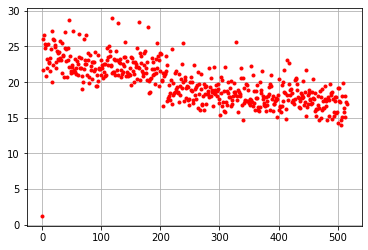

loading time is: 1.579648602000816


In [ ]:
start = timeit.default_timer()
total_step = len(data_loader)
graph_itrator = 0
graph_itrator_2 = 0
batch_loss = 0
actual_batch_size = 512
actual_batch_factor = actual_batch_size/32
number_of_batches = math.ceil(len(park_dataset.sample_names)/32)
myloss = checkpoint['loss']
model = model.train();
for epoch in tqdm(range(num_epochs)):
  L = 0
  start_load = timeit.default_timer()
  for i_batch , train_batch in enumerate(data_loader):
    start_batch = timeit.default_timer()  
    print("loading time is:",start_batch - start_load) 
    start_load = start_batch
    images = train_batch['image'].to(device)
    labels = complete_marking_vector_label_mult(train_batch).to(device)

    # Forward pass        
    outputs = model(images).to(device)
    outputs = outputs.reshape((-1,6,16,16))      
    myloss = my_loss(outputs.float(), labels.float())
    
    # Backward and optimize        
    myloss.backward()

    if graph_itrator % actual_batch_factor == 0:
      scheduler.step(batch_loss)        
      optimizer.step()
      optimizer.zero_grad()
      for g in optimizer.param_groups:
          lr = g['lr']
    
    batch_loss += myloss.item()
    # if graph_itrator % 30 == 0:  
    #   torch.save({
    #           'i_batch': i_batch,
    #           'model_state_dict': model.state_dict(),
    #           'optimizer_state_dict': optimizer.state_dict(),
    #           'loss': myloss
    #           }, r'/content/drive/MyDrive/model1_checkpoint_15000_rel_lr0.05_img_enh_1_8')
      
    print("epoch: ",epoch," batch: ",i_batch,"lr:",lr,"graph_itrator:",graph_itrator)
    stop_batch = timeit.default_timer()
    L += myloss.item()
    print('Batch Time: ', stop_batch - start_batch)
    time = stop_batch - start
    hrs = int((time)/(60*60))
    mins = int((time - ((60*60)*hrs))/60)
    print('Overall Time: ', hrs,"hrs , ",mins,"mins , ",(time)%60,"secs")
    
    
    if graph_itrator % actual_batch_factor == 0:
      plt.plot([graph_itrator_2], [batch_loss/actual_batch_factor],'.r')
      batch_loss = 0
      graph_itrator_2 +=1 
    plt.grid(b=True)
    graph_itrator +=1 
    display.clear_output(wait=True)
    display.display(pl.gcf())     
  print("Averged Total Loss = ",L/number_of_batches) 
    
stop = timeit.default_timer()
print('Time: ', stop - start)      

#### To change lr mid-training

In [ ]:
for i in range(len(optimizer.param_groups)):
   scheduler.optimizer.param_groups[i]['lr'] = 0.0000625        

### Mapper
* Maps the predicted output into : confidence , x (from 0 to 512) , y (from 0 to 512) , direction-x (from 0 to 512) , direction-y (from 0 to 512) , shape of marking point




In [ ]:
def mapper(prediction_in):
  prediction = torch.clone(prediction_in)
  for i in range(16):
    for j in range(16):
      prediction[:,1,i,j] =  prediction[:,1,i,j] + 16 + (32 * i)
      prediction[:,2,i,j] =  prediction[:,2,i,j] + 16 + (32 * j)

      cos_value = prediction[:,3, i, j] / 16
      sin_value = prediction[:,4, i, j] / 16
      # direction = math.atan(sin_value/cos_value) # if we want to know the angle
      x_val_mapped = prediction[:,1,i,j]
      y_val_mapped = prediction[:,2,i,j]
      x_dir = x_val_mapped + (40 * cos_value)
      y_dir = y_val_mapped + (40 * sin_value)
      prediction[:,3,i,j] = x_dir
      prediction[:,4,i,j] = y_dir

  return prediction

## Prediction

In [ ]:
def predict(image):
    out = model(image).to(device)
    out = out.reshape((-1,6,16,16))
    out = mapper(out)
    return out

## Visualizer 2

In [ ]:
def visualize_after_thres(image,prediction):
    pre = prediction
    plt.imshow(image.permute(1, 2, 0))
    for i in range(len(pre)):
        plt.plot([pre[i,1]],[pre[i][2]],'o')
        plt.plot([pre[i,3]],[pre[i][4]],'x')
    plt.show()

## Remove points lower than Thresthold 

* takes the predicted point and the threshold, check if the confidence value is less than this threshold then we remove this point




In [ ]:
def get_predicted_points(prediction, thresh): # prediction (training,6,16,16)
    """Get marking points from one predicted feature map."""
    assert isinstance(prediction, torch.Tensor)
    if len(prediction.shape) == 3:
        prediction = prediction.reshape((1,6,16,16))
    num_training_examples = prediction.shape[0]
    predicted_points = []
    prediction = prediction.detach().cpu()
    
    index = (torch.greater_equal(prediction[:,0,:,:],thresh))
    
    prediction = prediction.permute(0,2,3,1)
    
    for i in range(num_training_examples):
        predicted_points.append(prediction[i,index[i,:,:]])

    predicted_points_copy = []
    for i in range(len(predicted_points)):
      predicted_points_copy.append(torch.clone(predicted_points[i]))

    for i in range(len(predicted_points)): # 3la el training examples
      for j in range(len(predicted_points[i])): # 3la el points
        if predicted_points[i][j][1] < 10 and  predicted_points[i][j][2] < 10:  # remove points with negative x , y values
           predicted_points_copy[i] = torch.cat([predicted_points_copy[i][0:j,:], predicted_points_copy[i][j+1:,:]])
    return (predicted_points_copy)

## Remove Row from Tensor

In [ ]:
def remove_row_ls(tens,row_index_ls):
    tens_copy = torch.clone(tens)
    ls = []
    for i in range(tens_copy.shape[0]):
        ls.append(i)
    ls = torch.tensor(ls)
    #index = []
    for i in range(len(row_index_ls)):
        index = ls[ls!=row_index_ls[i]]
        ls = index
    index = torch.tensor(index)
    return torch.index_select(tens_copy, 0, index)

## Non-max suppression for near points


*   take predicted points and check if there is more than one point close to each other it will remove all of the except the one which have the highest confidence




In [ ]:
def non_maximum_suppression(pred_points): # pred_points (training,num_points,6) (list)
    """Perform non-maxmum suppression on marking points."""
    pred_copy = pred_points
    threshold_near = 40 # expermintal
    for k , tens in enumerate(pred_copy):
        index_arr = []
        for i in range(tens.shape[0]):
            for j in range(i + 1, tens.shape[0]):
                i_x = tens[i][1]
                i_y = tens[i][2]
                j_x = tens[j][1]
                j_y = tens[j][2]
                abs_x = abs(j_x - i_x)
                abs_y = abs(j_y - i_y)
                abs_dis = math.sqrt(math.pow(abs_x,2) + math.pow(abs_y,2))
                if abs_dis <= threshold_near:
                    idx = i if tens[i][0] < tens[j][0] else j
                    index_arr.append(idx)
  
        if(len(index_arr)!=0):
          pred_copy[k] = remove_row_ls(tens,index_arr)  
    return pred_copy        

## Calculate Distance between two points 

In [ ]:
def calc_point_squre_dist(point_a, point_b):
    """Calculate distance between two marking points."""
    x_a = point_a[1]
    y_a = point_a[2]
    x_b = point_b[1]
    y_b = point_b[2]

    distx = x_a - x_b
    disty = y_a - y_b
    dist = math.sqrt(math.pow(distx,2) + math.pow(disty,2))
    return dist

## Check the third point


*   function checks if the line passes between the two marking points conatins another third point between them or not



In [ ]:
angle_threhold = 5
def pass_through_third_point(marking_points, i, j):
    x_1 = marking_points[i][1]
    y_1 = marking_points[i][2]
    x_2 = marking_points[j][1]
    y_2 = marking_points[j][2]
    for point_idx, tens in enumerate(marking_points):
        if point_idx == i or point_idx == j:
            continue
        x_0 = tens[1]
        y_0 = tens[2]
        vec1 = np.array([x_0 - x_1, y_0 - y_1])
        vec2 = np.array([x_2 - x_1, y_2 - y_1])
        vec1 = vec1 / np.linalg.norm(vec1)
        vec2 = vec2 / np.linalg.norm(vec2)
        angle = math.acos(np.dot(vec1, vec2)) * (180/math.pi)
        if angle < angle_threhold:
            return True
    return False

In [ ]:
epsilon = 0.001  # check on number

# check if c between a,b
def isBetween(a, b, c):
    crossproduct = (c[2] - a[2]) * (b[1] - a[1]) - (c[1] - a[1]) * (b[2] - a[2])
    print ("crossproduct",crossproduct)
    # compare versus epsilon for floating point values, or != 0 if using integers 
    # sin 0 =0 , check theta >0 (not parallel)
    if abs(crossproduct) > epsilon:
        return False

    # cos 180 = -1, check that they are in the same direction
    dotproduct = (c[1] - a[1]) * (b[1] - a[1]) + (c[2] - a[2])*(b[2] - a[2])
    print ("dotproduct",dotproduct)
    if dotproduct < 0:
        return False

    squaredlengthba = (b[1] - a[1])*(b[1] - a[1]) + (b[2] - a[2])*(b[2] - a[2])
    print ("squaredlengthba",squaredlengthba)

    if dotproduct > squaredlengthba:
        return False

    return True


## Calculate Direction(angle)


*   based on the x_differnce and the y_differnce to determine the angle between them (inwhich quad they loacte)




In [ ]:
def calc_angle(p1,p2):
  y_diff = p2[1]- p1[1]
  x_diff = p2[0] - p1[0]
  if x_diff == 0 and y_diff ==0 :
    return 0
  theta = math.atan(abs( y_diff/x_diff)) * (180/math.pi)  
  if x_diff >=0 and y_diff >=0:
    return theta
  elif x_diff < 0 and y_diff >=0:
    return 180- theta
  elif x_diff < 0 and y_diff < 0:
    return - 180 + theta
  elif x_diff > 0 and y_diff <0:
    return -1* theta
  else:
    return theta

In [ ]:
def calc_angle_vector(p1):
  
  y_diff = p1[1]
  x_diff = p1[0] 
  if x_diff == 0 and y_diff ==0 :
    return 0
  theta = math.atan(abs( y_diff/x_diff)) * (180/math.pi)
  if x_diff >=0 and y_diff >=0:
    return theta
  elif x_diff < 0 and y_diff >=0:
    return 180- theta
  elif x_diff < 0 and y_diff < 0:
    return  180+theta       #270 - theta
  elif x_diff > 0 and y_diff <0:
    return -1* theta
  else:
    return theta

## Calculate difference in direction

In [ ]:
def abs_direction_diff(direction_a, direction_b):
    """Calculate the angle between two direction."""
    diff = abs(abs(direction_a) - abs(direction_b))
    return diff

In [ ]:
def direction_diff(direction_a, direction_b):
    """Calculate the angle between two direction."""
    diff = abs((direction_a) - (direction_b))
    return diff

## Determine Point Shape


*   determine the shape of the slot line based on the vector joining the two slot points and the vector between the point and its direction




In [ ]:
none = 0
l_down = 2
t_down = 3
t_middle = 4
t_up = 5
l_up = 6 

def detemine_point_shape(point, vector):
    """Determine which category the point is in."""
    vec_direct =calc_angle_vector(vector) #*(180/math.pi)
   # vec_direct_up = calc_angle_vector([-1*vector[0], vector[1]]) #*(180/math.pi)
    vec_direct_up = 180 - vec_direct
    vec_direct_down = calc_angle_vector([vector[0], -1*vector[1]]) #*(180/math.pi)
    marking_direction =  calc_angle ([point[1],point[2]],[point[3],point[4]]) #*(180/math.pi)
    print('vector',vec_direct,'mark',marking_direction,'v up',vec_direct_up,'v down',vec_direct_down)
    if point[5] < 50:
        if abs_direction_diff(vec_direct, marking_direction) >60 and  abs_direction_diff(vec_direct, marking_direction) <135:  # < angle 13.5
            print('ana middle t')
            return t_middle
        
        if direction_diff(vec_direct_down, marking_direction) <50:
            print('ana down t')
            return t_down
    else:
      difference = marking_direction - vec_direct_down 
      if difference> 170:
          print('ana down l')
          return l_down
      if difference < 170:
          print('ana up l')
          return l_up
    return none

## Pair Marking Points to form slots 



*  according to the shape returned from the "determine_point_shape" function we check whether these two shapes could form a slot or not.







In [ ]:
def pair_marking_points(point_a, point_b):
    """See whether two marking points form a slot."""
    vector_ab = np.array([point_b[1] - point_a[1], point_b[2] - point_a[2]])
    vector_ab = vector_ab / np.linalg.norm(vector_ab)
    point_shape_a = detemine_point_shape(point_a, vector_ab)
    point_shape_b = detemine_point_shape(point_b, -vector_ab)
    none = 0
    l_down = 2
    t_down = 3
    t_middle = 4
    t_up = 5
    l_up = 6 
    #print("point shapes",point_shape_a,point_shape_b)
    if ( point_shape_a == l_up and point_shape_b == l_up)  :
      return [1,point_shape_a,point_shape_b]
    if ( point_shape_a == l_down and point_shape_b == l_down)  :
      return [1,point_shape_a,point_shape_b]
    if  ( point_shape_a == t_middle and point_shape_b == t_middle ) :
      return [1,point_shape_a,point_shape_b]
    if (point_shape_a == t_down and point_shape_b == t_down) :  
      vect1 = np.array([point_a[3] - point_a[1], point_a[4] - point_a[2]])
      vect1 = vect1 / np.linalg.norm(vect1)
      vect2 = np.array([point_b[3] - point_b[1], point_b[4] - point_b[2]])
      vect2 = vect2 / np.linalg.norm(vect2)
      dot_product = (np.dot(vect1, vect2))
      print('dot',dot_product)
      if dot_product > 0.3:
        return [1,point_shape_a,point_shape_b]
      else:
        return [0]
    if (point_shape_a == l_up and point_shape_b == t_middle) or (point_shape_b == l_up and point_shape_a == t_middle):
      return [1,point_shape_a,point_shape_b]
    if (point_shape_a ==t_middle  and point_shape_b ==l_down)  or (point_shape_b ==t_middle  and point_shape_a ==l_down):
      return [1,point_shape_a,point_shape_b]
    if (point_shape_a ==t_middle  and point_shape_b ==l_up)  or (point_shape_b ==t_middle  and point_shape_a ==l_up):
      return [1,point_shape_a,point_shape_b]
    if point_shape_a == t_up and point_shape_b == l_up or (point_shape_b == t_up and point_shape_a == l_up ):
      return [1,point_shape_a,point_shape_b]
    #if point_shape_a == t_up and point_shape_b == t_up:
     # return 1
    if (point_shape_a == l_down and point_shape_b == l_down) :
      return [1,point_shape_a,point_shape_b]
    if (point_shape_a == l_down and point_shape_b == t_down) or (point_shape_b == l_down and point_shape_a == t_down):
      return [1,point_shape_a,point_shape_b]
    if (point_shape_a == t_down and point_shape_b == l_up) or (point_shape_b == t_down and point_shape_a == l_up):
      return [1,point_shape_a,point_shape_b]
    
    return [0]                         


## Forming Slots

*   the function gets the predicted marking points and then we loop on point by point with the remaining ones and check if they lie between either parallel or perpendicular distance range and then pass it to determine point shape, pair marking point function and based on the returned result it append the slot details (points forming it and its type) to the slot list




In [ ]:
perpend_min = 120
perpend_max = 190  
parallel_min = 340 
parallel_max = 370 


def inference_slots(marking_points):
    """Inference slots based on marking points."""
    num_detected = marking_points.shape[0]
    print('numebr of points',num_detected)
    perpen_parallel = 0  # perpendicular = 1 , parallel = 2
    
    slot ={}
    slots = []

    marks_list = set()
    slots_list = []
    for i in range(num_detected - 1):
        for j in range(i + 1, num_detected):
            #print (i,j)
            point_i = marking_points[i]
            point_j = marking_points[j]
            #print('poin i and j',point_i,point_j)
            # Step 1: length filtration.
            distance = calc_point_squre_dist(point_i, point_j)
            print('distance',distance)
            #print ("distance",distance)
            if not (perpend_min <= distance <= perpend_max
                    or parallel_min <= distance <= parallel_max):
                continue
                
            # Step 2: pass through filtration.
            if pass_through_third_point(marking_points, i, j) and pass_through_third_point(marking_points, j, i):
                continue
            result = pair_marking_points(point_i, point_j)
            #print("result",result)
            if  (perpend_min <= distance <= perpend_max):
                perpen_parallel = 1 # perpendiculer
            elif  (parallel_min <= distance <= parallel_max):
                perpen_parallel = 2 # parallel

            
            if len(result) <= 1:
              if result ==0:
                print('no pair')
                continue
            else:
              if result[0] == 1:
                print('pair',i,j,marking_points[i][1] - marking_points[j][1],marking_points[i][2] - marking_points[j][2])
                print('........distnace',distance)
                first_point,second_point = order_pair(marking_points[i],marking_points[j])
                print('done order')
                #if abs(marking_points[i][1] - marking_points[j][1]) <150 and abs(marking_points[i][2] - marking_points[j][2])<150:
                test1 = {'x1': first_point[1], 'y1': first_point[2],'dir_x1': first_point[3], 'dir_y1':first_point[4],
                    'x2': second_point[1],'y2': second_point[2],'dir_x2': second_point[3], 'dir_y2': second_point[4],
                    'type': perpen_parallel,'type1':result[1],'type2':result[2]}

                marks_list.add((marking_points[i],marking_points[j]))
                slots_list.append((i+1,j+1,perpen_parallel))
                slot.update(test1.copy())
                slots.append(slot.copy())

                #print('updated slot',slots)
                #break
    slots2={'marks':  list(marks_list),'slots':slots_list}
    return slots,slots2

### Order points pair clockwise

In [ ]:
def order_pair(point1,point2):
  if abs(point2[2]-point1[2])<20:
    if point2[1] > point1[1]:
      return point2,point1
    else:
      return point1,point2
  else:
    if max(point2[1] , point1[1]) >255:
      if point2[2] < point1[2]:
        return point2,point1
      else:
        return point1,point2
    elif max(point2[1] , point1[1]) <255:
      print('first half')
      if point1[2]> point2[2] :
        print('1,2')
        return point1,point2
      else:
        return point2,point1

### Slot visualizer

In [ ]:
def visualize_slot(image,prediction):
    
    slots = prediction
    print('aana hrsm',slots)
    plt.imshow(image.permute(1, 2, 0))
    for i in range(len(slots)):
     #   plt.plot([pre[i][1]],[pre[i][2]],'o')
      #  plt.plot([pre[i][3]],[pre[i][4]],'o')
       x = [slots[i]['x1'],slots[i]['x2']]
       y= [slots[i]['y1'],slots[i]['y2']]
       mark1_x = [slots[i]['x1'],slots[i]['dir_x1']]
       mark1_y = [slots[i]['y1'],slots[i]['dir_y1']]
       mark2_x = [slots[i]['x2'],slots[i]['dir_x2']]
       mark2_y = [slots[i]['y2'],slots[i]['dir_y2']]
      
       p1 = '1'
       p2 = '2'
       plt.text(slots[i]['x1']+15, slots[i]['y1']  , p1,fontsize=10 , color='white')
       plt.text(slots[i]['x2']+15, slots[i]['y2'] , p2,fontsize=10 , color='white')
       txt = 'slot '+ str(i+1)
       plt.text(max(slots[i]['x1'],slots[i]['x2']),(slots[i]['y1']+slots[i]['y2']) /2 +15 , txt,fontsize=12 , color='red')
       #dir_x = [slots[i]['dir_x1'],slots[i]['dir_x2']]
       #dir_y = [slots[i]['dir_y1'],slots[i]['dir_y2']]
       plt.plot(x,y,mark1_x,mark1_y,mark2_x, mark2_y,linewidth=3, markersize=3, color='green')
       
    plt.show()

### Testing Slot detection


In [ ]:
k = 3886
model= model.eval()
start = timeit.default_timer()
predict_awal2 = predict(park_dataset[k]['image'].reshape((1,3,512,512)).to(device))
stop = timeit.default_timer()
print('Time: ', stop - start)
 
predict_ba3d2= get_predicted_points(predict_awal2,80)

predict_ba3d2= non_maximum_suppression(predict_ba3d2)
res3,res_vac = inference_slots(predict_ba3d2[0])
visualize_after_thres(park_dataset[k]['image'],predict_ba3d2[0])
visualize_slot(park_dataset[k]['image'],res3)

### initialize marking points predictor

In [ ]:
def init_marking_points_model():
  model = ConvNet().to(device)
  checkpoint = torch.load(r'/model_weights') # weights path
  model.load_state_dict(checkpoint['model_state_dict'])
  return model
  

### Takes an image returns predicted Marking points

In [ ]:

def image_predict_marking_points(input_image,model):
  image_transform = ToTensor()
  input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
  input_image = image_transform(input_image)

  # if image is not 512 x 512
  # input_image = input_image.permute(1,2,0)
  # input_image = transform.resize(input_image, (512, 512))
  # input_image = torch.tensor(input_image).permute(2,0,1)

  model  = model.eval()
  predict_awal = predict(input_image.reshape((1,3,512,512)).to(device))
  predict_ba3d = get_predicted_points(predict_awal,70)
  predict2 = non_maximum_suppression(predict_ba3d)
  visualize_after_thres(input_image,predict2[0])
  return predict2  